<a href="https://colab.research.google.com/github/Trace-Zero/Simulated-dataset-HToAATo2Mu2B/blob/main/MS_Collaboration_(2024)_Simulated_dataset_HToAATo2Mu2B_MA25_TuneCP5_13TeV_madgraph_pythia8_in_NANOAODSIM_format_for_2016_collision_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install uproot awkward hist


In [10]:
!pip install --upgrade uproot awkward hist requests urllib3



In [11]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import hist
import urllib3
import requests
import io

In [12]:
url_signal = "https://eospublic.cern.ch/eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/HToAATo2Mu2B-MA25_TuneCP5_13TeV-madgraph-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2560000/FC3D450A-CEBF-6342-9526-CAE7BDFB401A.root"


In [8]:
response = requests.get(url_signal, verify=False)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eospublic.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [13]:
#for control
if response.status_code != 200:
  raise Exception(f"Failed to download file. Status code: {response.status_code}")


In [14]:
file_like = io.BytesIO(response.content)

In [15]:
file = uproot.open(file_like)
tree = file["Events"]

print("Event number:", tree.num_entries)

Event number: 200000


In [16]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HTXS_Higgs_pt        | float                    | AsDtype('>f4')
HTXS_Higgs_y         | float                    | AsDtype('>f4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype(

In [17]:
branches = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge", "Jet_pt", "Jet_eta", "Jet_mass"]

In [18]:
arrays = tree.arrays(branches)

In [19]:
def pyplot_histogram(array, name, bins=50, xlabel="", ylabel="", density=False ):
  plt.hist(ak.flatten(array), bins=bins, histtype="step", label=name)
  plt.xlabel(xlabel if xlabel else name)
  plt.ylabel(ylabel if ylabel else "Event Count")
  plt.title(name + " Histogram")
  plt.grid(True)
  plt.legend()
  plt.show()


In [20]:
muon_pt_all = (arrays["Muon_pt"])
muon_pt_cut = muon_pt_all[(muon_pt_all > 0) & (muon_pt_all < 81)]

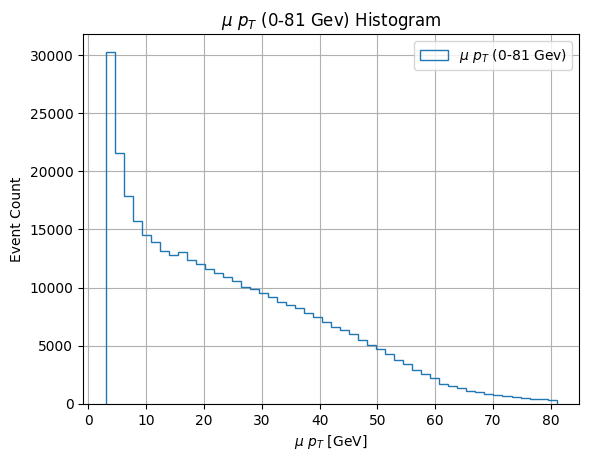

In [21]:
pyplot_histogram(muon_pt_cut, r"$\mu$ $p_T$ (0-81 Gev)", bins=50, xlabel=r"$\mu$ $p_T$ [GeV]",)



In [22]:
muon_eta_all = (arrays["Muon_eta"])
muon_eta_cut = muon_eta_all[(muon_eta_all > -3) & (muon_eta_all < 3)]

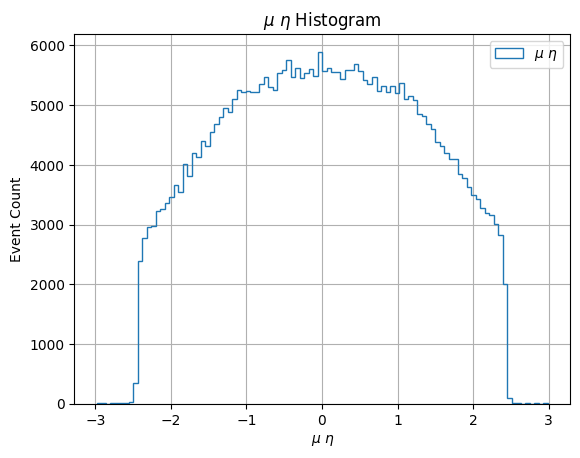

In [23]:
pyplot_histogram(muon_eta_cut, r"$\mu$ $\eta$", bins=100, xlabel="$\mu$ $\eta$")

In [24]:
muon_phi_all = (arrays["Muon_phi"])
muon_phi_cut = muon_phi_all[(muon_phi_all > -3.2) & (muon_phi_all < 3.2)]

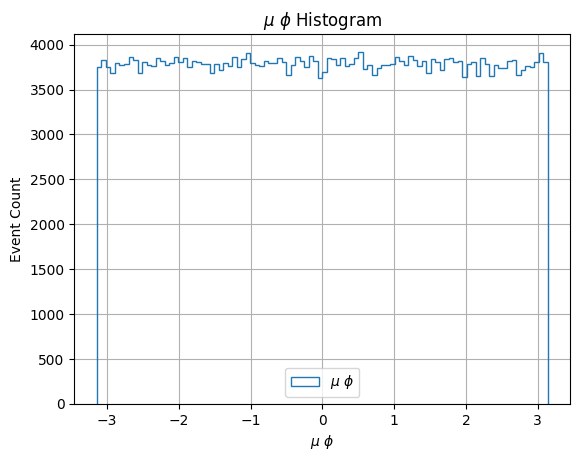

In [25]:
pyplot_histogram(muon_phi_cut, r"$\mu$ $\phi$", bins=100, xlabel="$\mu$ $\phi$")


In [26]:
muon_mass_all = (arrays["Muon_mass"])
muon_mass_cut = muon_mass_all[(muon_mass_all > 0.1056) & (muon_mass_all < 4)]

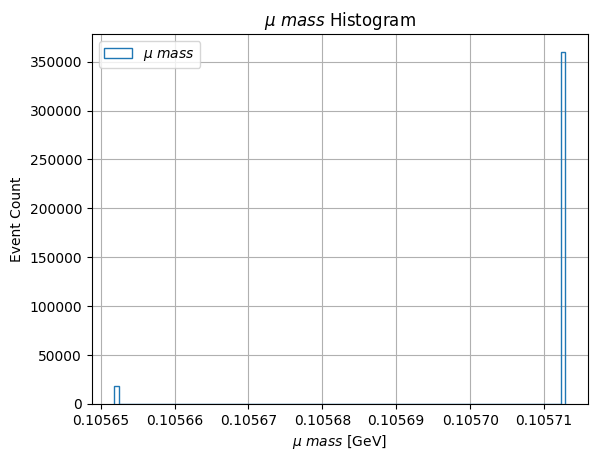

In [27]:
pyplot_histogram(muon_mass_cut, r"$\mu$ $mass$", bins=100, xlabel="$\mu$ $mass$ [GeV]")

In [28]:
#muon_charge_all = (arrays["Muon_charge"])
#muon_charge_cut = muon_charge_all[(muon_charge_all > 0) & (muon_charge_all < 1)]

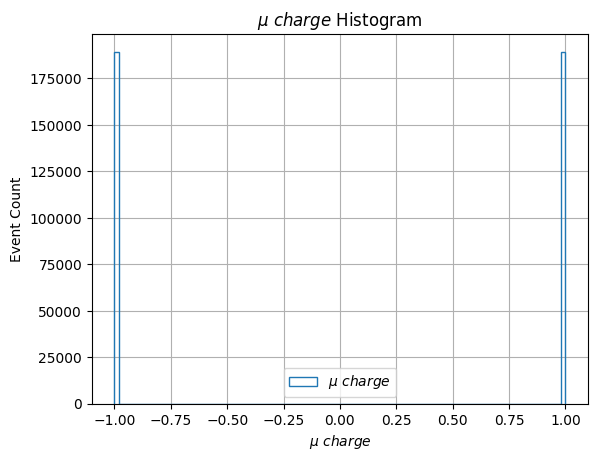

In [29]:
pyplot_histogram(arrays["Muon_charge"], "$\mu$ $charge$", bins=100, xlabel="$\mu$ $charge$")

In [30]:
jet_pt_all = (arrays["Jet_pt"])
jet_pt_cut = jet_pt_all[(jet_pt_all > 0) & (jet_pt_all < 175)]

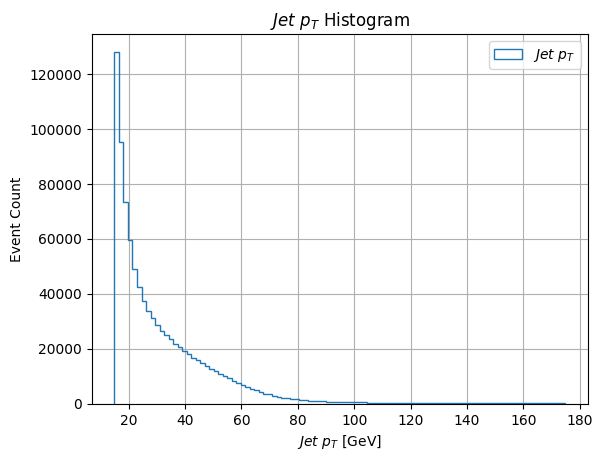

In [31]:
pyplot_histogram(jet_pt_cut, "$Jet$ $p_{T}$", bins=100, xlabel="$Jet$ $p_{T}$ [GeV]")

In [32]:
jet_eta_all = (arrays["Jet_eta"])
jet_eta_cut = jet_eta_all[(jet_eta_all > -4.5) & (jet_eta_all < 4.5)]

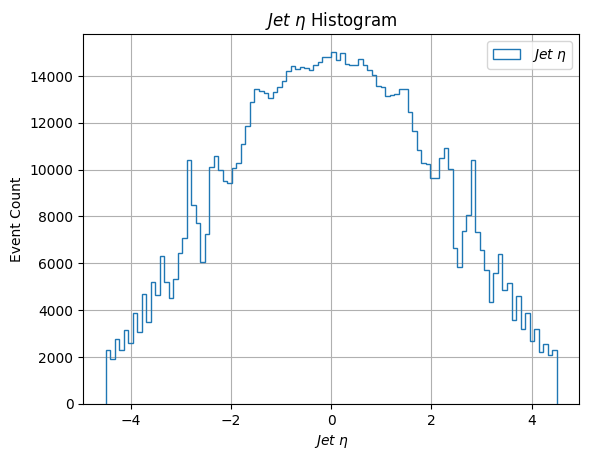

In [33]:
pyplot_histogram(jet_eta_cut, "$Jet$ $\eta$", bins=100, xlabel="$Jet$ $\eta$")

In [34]:
jet_mass_all = (arrays["Jet_mass"])
jet_mass_cut = jet_mass_all[(jet_mass_all > 0) & (jet_mass_all < 35)]

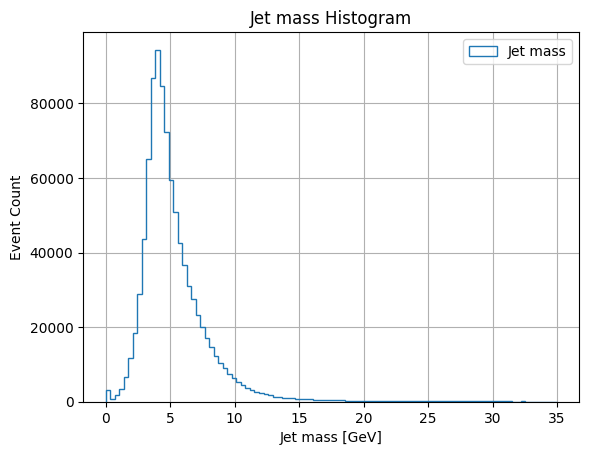

In [35]:
pyplot_histogram(jet_mass_cut, "Jet mass", bins=100, xlabel="Jet mass [GeV]")

In [36]:

#pyplot_histogram(arrays["Muon_phi"], "Muon #phi", bins=100, xlabel="Muon #phi")
#pyplot_histogram(arrays["Muon_mass"], "Muon mass", bins=100, xlabel="Muon mass [GeV]")
#pyplot_histogram(arrays["Muon_charge"], "Muon charge", bins=100, xlabel="Muon charge")
#pyplot_histogram(arrays["Jet_pt"], "Jet p_{T}", bins=100, xlabel="Jet p_{T} [GeV]")
#pyplot_histogram(arrays["Jet_eta"], "Jet #eta", bins=100, xlabel="Jet #eta")
#pyplot_histogram(arrays["Jet_mass"], "Jet mass", bins=100, xlabel="Jet mass [GeV]")

In [37]:
#en az 2 muon ve 2 jet olması için seçim işlemi ama daha iyisini göstermiştiniz
muon_mask = ak.num(arrays["Muon_pt"]) >= 2
jet_mask = ak.num(arrays["Jet_pt"]) >= 2
event_mask_base = muon_mask & jet_mask

In [38]:
muon_pt_filtered = arrays["Muon_pt"][event_mask_base]
muon_eta_filtered = arrays["Muon_eta"][event_mask_base]
muon_phi_filtered = arrays["Muon_phi"][event_mask_base]
muon_mass_filtered = arrays["Muon_mass"][event_mask_base]
muon_charge_filtered = arrays["Muon_charge"][event_mask_base]

jet_pt_filtered = arrays["Jet_pt"][event_mask_base]
jet_eta_filtered = arrays["Jet_eta"][event_mask_base]
jet_mass_filtered = arrays["Jet_mass"][event_mask_base]


In [39]:
#ilk müon
muon0_pt_cut = muon_pt_filtered[:, 0] > 5
muon0_eta_cut = abs(muon_eta_filtered[:, 0]) < 2.4
muon0_phi_cut = muon_phi_filtered[:, 0] < 3.3
muon0_mass_cut = muon_mass_filtered[:, 0] > 0.105
muon0_charge_cut = abs(muon_charge_filtered[:, 0]) == 1


#ikinci müon
muon1_pt_cut = muon_pt_filtered[:, 1] > 5
muon1_eta_cut = abs(muon_eta_filtered[:, 1]) < 2.4
muon1_phi_cut = muon_phi_filtered[:, 1] < 3.3
muon1_mass_cut = muon_mass_filtered[:, 1] > 0.105
muon1_charge_cut = abs(muon_charge_filtered[:, 1]) == 1

In [40]:
#ilk jet
jet0_pt_cut = jet_pt_filtered[:, 0] > 15
jet0_eta_cut = abs(jet_eta_filtered[:, 0]) < 3.3
jet0_mass_cut = jet_mass_filtered[:, 0] > 0.0

#ikinci jet
jet1_pt_cut = jet_pt_filtered[:, 1] > 15
jet1_eta_cut = abs(jet_eta_filtered[:, 1]) < 3.3
jet1_mass_cut = jet_mass_filtered[:, 1] > 0.0



In [41]:
#1. ve 2. müon için tüm cut lar
muon0_allcuts = (muon0_pt_cut & muon0_eta_cut & muon0_phi_cut & muon0_mass_cut & muon0_charge_cut)
muon1_allcuts = (muon1_pt_cut & muon1_eta_cut & muon1_phi_cut & muon1_mass_cut & muon1_charge_cut)

#1. ve 2. jet için tüm cut lar
jet0_allcuts = (jet0_pt_cut & jet0_eta_cut & jet0_mass_cut)
jet1_allcuts = (jet1_pt_cut & jet1_eta_cut & jet1_mass_cut)

#Tüm event seçim maskesi
final_event_mask  = (muon0_allcuts & muon1_allcuts & jet0_allcuts & jet1_allcuts)

In [42]:
#seçilen eventlerin filtrelenmiş hali
muon_pt_selected = muon_pt_filtered[final_event_mask]
muon_eta_selected = muon_eta_filtered[final_event_mask]
muon_phi_selected = muon_phi_filtered[final_event_mask]
muon_mass_selected = muon_mass_filtered[final_event_mask]
muon_charge_selected = muon_charge_filtered[final_event_mask]

jet_pt_selected = jet_pt_filtered[final_event_mask]
jet_eta_selected = jet_eta_filtered[final_event_mask]
jet_mass_selected = jet_mass_filtered[final_event_mask]

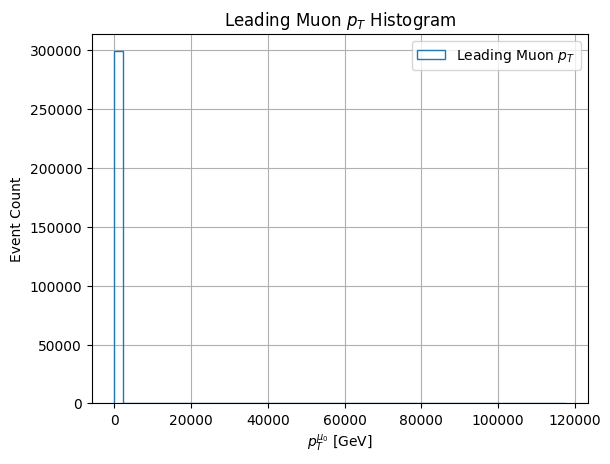

In [43]:
pyplot_histogram(muon_pt_selected, "Leading Muon $p_T$", bins=50, xlabel="$p_T^{\mu_0}$ [GeV]",)


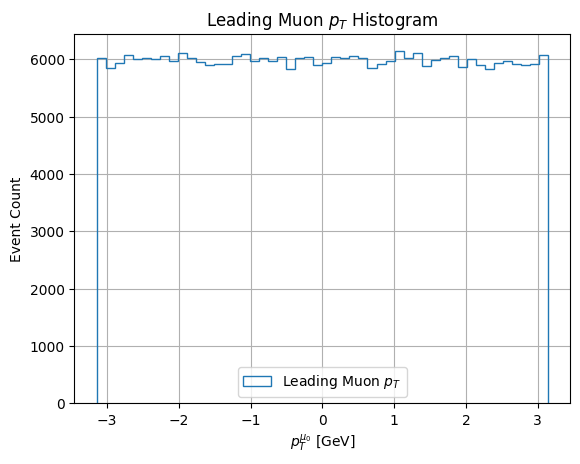

In [44]:
pyplot_histogram(muon_phi_selected, "Leading Muon $p_T$", bins=50, xlabel="$p_T^{\mu_0}$ [GeV]",)


In [45]:
mu_pt = tree["Muon_pt"].array()
mu_eta = tree["Muon_eta"].array()
mu_phi = tree["Muon_phi"].array()
mu_mass = tree["Muon_mass"].array()
mu_charge = tree["Muon_charge"].array()
mu_id = tree["Muon_tightId"].array()

jet_pt = tree["Jet_pt"].array()
jet_eta = tree["Jet_eta"].array()
jet_phi = tree["Jet_phi"].array()
jet_mass = tree["Jet_mass"].array()
jet_btag = tree["Jet_btagDeepB"].array()

In [46]:
tight_muons = (mu_id == 1)

mu_mask = ak.num(mu_pt[tight_muons]) >= 2


bjet_mask = ak.num(jet_btag[jet_btag > 0.8]) >= 2


final_mask = mu_mask & bjet_mask
!pip install uproot awkward vector matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 6.2 MB/s eta 0:00:00


In [47]:
#Nilay added
import vector
vector.register_awkward()

muons = ak.zip({
    "pt": mu_pt[tight_muons],
    "eta": mu_eta[tight_muons],
    "phi": mu_phi[tight_muons],
    "mass": mu_mass[tight_muons]
}, with_name="Momentum4D")

jets = ak.zip({
    "pt": jet_pt[jet_btag > 0.8],
    "eta": jet_eta[jet_btag > 0.8],
    "phi": jet_phi[jet_btag > 0.8],
    "mass": jet_mass[jet_btag > 0.8]
}, with_name="Momentum4D")

mu1 = muons[final_mask][:, 0]
mu2 = muons[final_mask][:, 1]
b1 = jets[final_mask][:, 0]
b2 = jets[final_mask][:, 1]

Amm = (mu1 + mu2).mass
Abb = (b1 + b2).mass
H_mass = (mu1 + mu2 + b1 + b2).mass

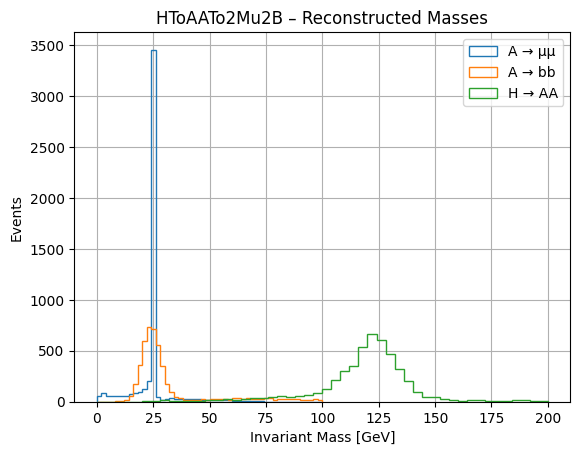

In [48]:
plt.hist(ak.to_numpy(Amm), bins=50, range=(0, 100), histtype='step', label="A → μμ")
plt.hist(ak.to_numpy(Abb), bins=50, range=(0, 100), histtype='step', label="A → bb")
plt.hist(ak.to_numpy(H_mass), bins=50, range=(0, 200), histtype='step', label="H → AA")
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("HToAATo2Mu2B – Reconstructed Masses")
plt.show()


**How do particles leave traces in detectors?**


*  Charged particles passes through medium of detector.

1. It ionizes atoms like silicon.
2. Ionization generates electrical signals that picked up by the detector electronics as a hit or track point.
3. Multiple hits across layers are combined to reconstruct the trajectory (track) of the particle.
4. If detector has a magnetic field, track will curve and amount of curve inverse related with momentum.
5. Diraction of curvature relates + - charge.
6. By tracing the track backwards we can estimate exact production point in space that where the particle was created.



**In which layers of the detector are muons observed and how are they detected? (CMS)**

1.   **Silicon Tracker :**Curved track for charge and momentum.
2.   **ECAL :**Small energy deposit ( μ don't interact electromagnetically like electrons.)
3.   **HCAL :** Small Deposit (μ don't interact via strong force like hadrons.)
4. **Muon chambers :** μ ionizes gas inside this chambers and electoronics collect and produce electrical signal as a hit and multiple hits reconstruct a track segment in μ system.


**What is a Jet and how they formed and defined?**


*   **Jet defined as:**

  1.   Jet = cluster of particles or energy deposits.
  2.   Reconstructed using clustering algorithms.
  3. Defined by, diraction, energy and cone size(Radius R)
  4. Represents original parton(quark/gluon)


*  **Jets formed as:**
  1.   quark or gluon is created in a high enegy collisions.
  2.   due to QCD they cann't exist freely so they radiate more partons[(Parton shower) ](https://en.wikipedia.org/wiki/Parton_(particle_physics))

  3. These partons [hadronize](https://en.wikipedia.org/wiki/Hadronization) into visible particles(π, κ, etc).
  4. The resulting spray of hadrons forms a [jet ](https://en.wikipedia.org/wiki/Jet_(particle_physics)), detected as a cone of energy in the calorimeter.




**Basic properties of μ particle**


*   Type: Lepton(2nd gen)
*   Charge : -1e and for anti μ +1e  where e = 1.6×10−19 C
*   Mass :  105.6583755(23) MeV/c2 and 1.883531627(42)×10−28 kg
* Mean lifetime : 	2.1969811(22)×10−6 s
* spin : 1/2
* Detector behavior: Minimum ionising particle






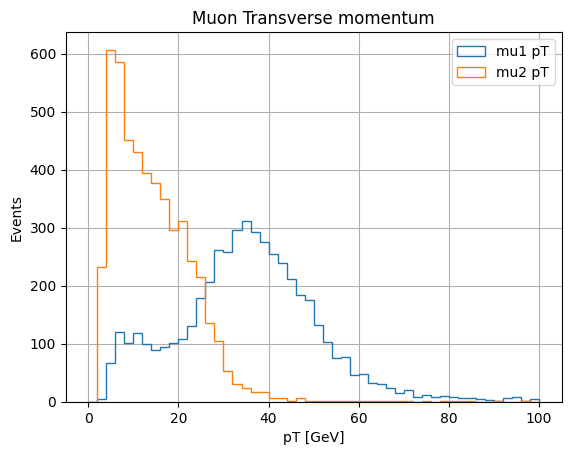

In [74]:
plt.hist(ak.to_numpy(mu1.pt), bins=50, range=(0, 100), histtype='step', label="mu1 pT")
plt.hist(ak.to_numpy(mu2.pt), bins=50, range=(0, 100), histtype='step', label="mu2 pT")
plt.xlabel("pT [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("Muon Transverse momentum")
plt.show()

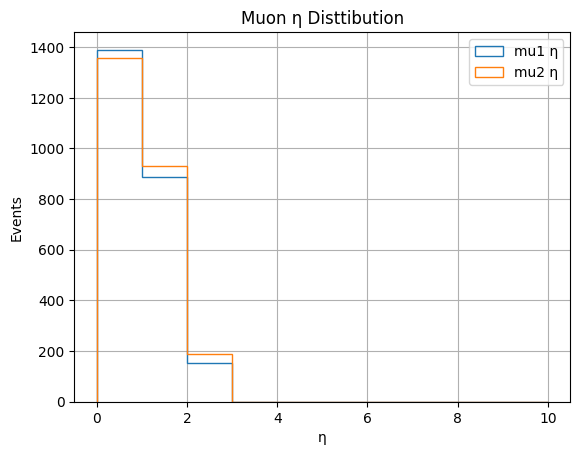

In [79]:
plt.hist(ak.to_numpy(mu1.eta), bins=10, range=(0, 10), histtype='step', label="mu1 η")
plt.hist(ak.to_numpy(mu2.eta), bins=10, range=(0, 10), histtype='step', label="mu2 η")
plt.xlabel("η")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("Muon η Disttibution")
plt.show()

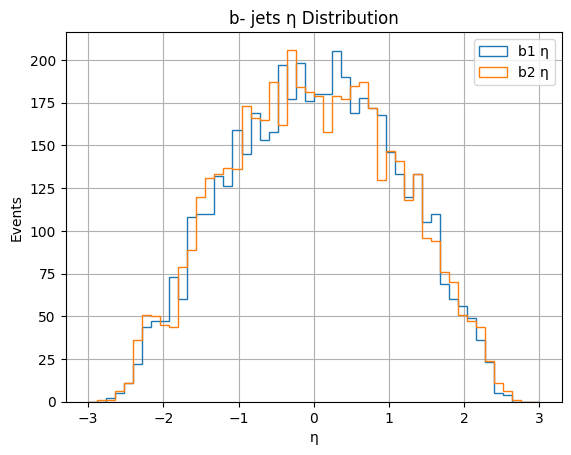

In [50]:
plt.hist(ak.to_numpy(b1.eta), bins=50, range=(-3, 3), histtype='step', label="b1 η")
plt.hist(ak.to_numpy(b2.eta), bins=50, range=(-3, 3), histtype='step', label="b2 η")
plt.xlabel("η")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("b- jets η Distribution")
plt.show()

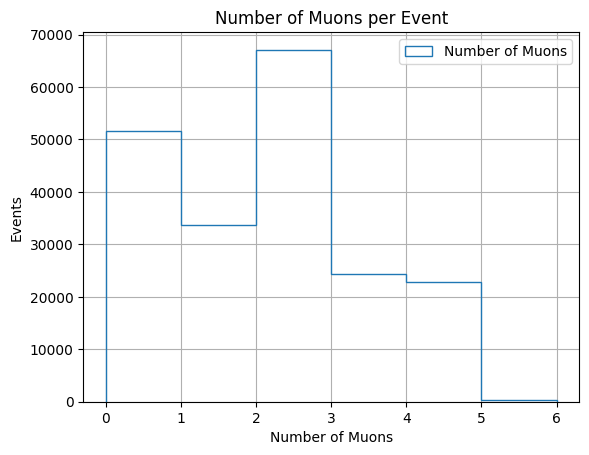

In [51]:
num_muons_per_event = ak.num(muons, axis=1)
plt.hist(num_muons_per_event, bins=6, range=(0, 6), histtype='step', label="Number of Muons")
plt.xlabel("Number of Muons")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("Number of Muons per Event")
plt.show()

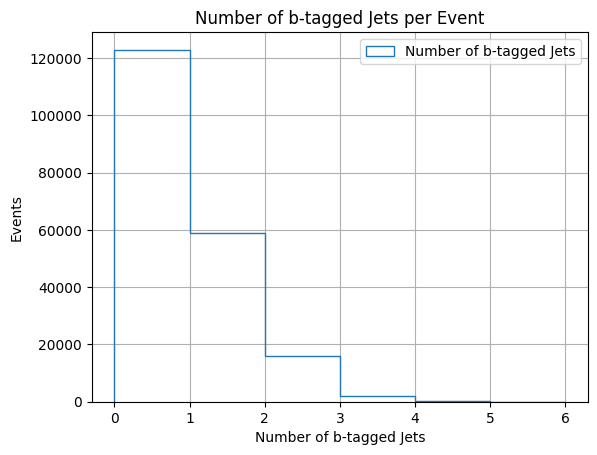

In [52]:
num_bjets_per_event = ak.num(jets, axis=1)
plt.hist(num_bjets_per_event, bins=6, range=(0, 6), histtype='step', label="Number of b-tagged Jets")
plt.xlabel("Number of b-tagged Jets")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.title("Number of b-tagged Jets per Event")
plt.show()

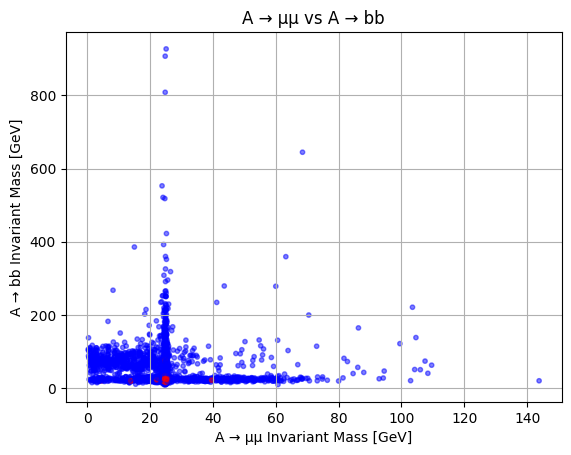

In [72]:
x = np.round(ak.to_numpy(Amm), 1) # 0.1Gev
y = np.round(ak.to_numpy(Abb), 1)

counts = np.array([np.sum((x == xi) & (y == yi)) for xi, yi in zip(x, y)])

colors = np.where(counts > 1, 'red', 'blue')

plt.scatter(x, y, alpha=0.5, s=10, c=colors)
plt.xlabel("A → μμ Invariant Mass [GeV]")
plt.ylabel("A → bb Invariant Mass [GeV]")
plt.title("A → μμ vs A → bb")
plt.grid(True)
plt.show()


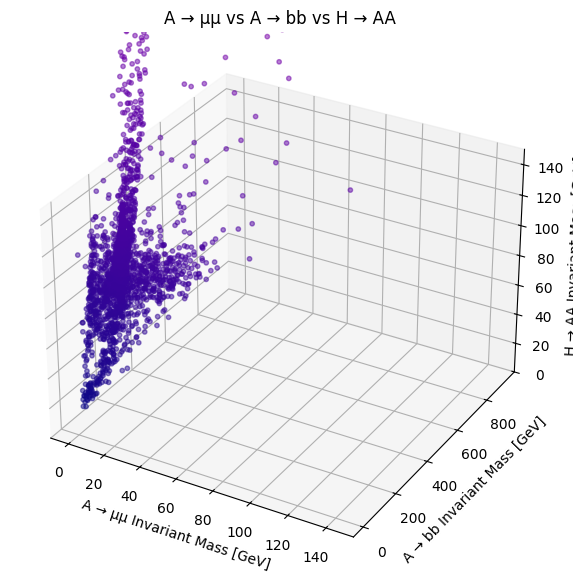

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

z = ak.to_numpy(H_mass)

ax.scatter(x,  y, z, c=z, cmap='plasma', s=10, alpha=0.5)
ax.set_xlabel('A → μμ Invariant Mass [GeV]')
ax.set_ylabel('A → bb Invariant Mass [GeV]')
ax.set_zlabel('H → AA Invariant Mass [GeV]')
ax.set_title('A → μμ vs A → bb vs H → AA')
ax.set_zlim(0, 150)

plt.show()